### import libery

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()

In [2]:
x=sym.symbols('x')
expr=x+1
x=2
print(expr)

x + 1


Changing ``x`` to ``2`` had no effect on expr. This is because ``x = 2`` changes the Python variable ``x`` to ``2``, but has no effect on the SymPy Symbol ``x``, which was what we used in creating ``expr``. When we created ``expr``, the Python variable ``x`` was a Symbol. After we created, it, we changed the Python variable ``x`` to ``2``. But expr remains the same. This behavior is not unique to SymPy. All Python programs work this way: if a variable is changed, expressions that were already created with that variable do not change automatically. For example

In [3]:
x = 'abc'
expr = x + 'def'
print(expr)
x = 'ABC'
print(expr)

abcdef
abcdef


In [4]:
x = sym.symbols('x')
expr = x + 1
expr.subs(x, 2)

In [5]:
a = (x + 1)**2
b = x**2 + 2*x + 1
sym.simplify(a - b)

In [6]:
c = x**2 - 2*x + 1
sym.simplify(a - c)

In [7]:
a = sym.cos(x)**2 - sym.sin(x)**2
b = sym.cos(2*x)
a.equals(b)

True

In [8]:
1/2

In [9]:
sym.Rational(1,2)

In [10]:
x+sym.Rational(1,2)

### Substitution

In [11]:
y, z=sym.symbols('y z')

In [12]:
expr = sym.cos(x) + 1
expr.subs(x, y)

In [13]:
expr.subs(x, 0)

In [14]:
expr = x**y
print(expr)

expr=expr.subs(y, x**y)
print(expr)

expr=expr.subs(y, x**x)
print(expr)

x**y
x**(x**y)
x**(x**(x**x))


There are two important things to note about ``subs``. First, it returns a new expression. SymPy objects are immutable. That means that subs does not modify it in-place. For example

In [15]:
expr = sym.cos(x)
print(expr.subs(x, 0))
print(expr)

1
cos(x)


Here, we see that performing ``expr.subs(x, 0)`` leaves ``expr`` unchanged.In fact, since SymPy expressions are immutable, no function will change them in-place. All functions will return new expressions.
To perform multiple substitutions at once, pass a list of ``(old, new)`` 
pairs to `subs`.

In [16]:
expr = x**3 + 4*x*y - z
expr.subs([(x, 2), (y, 4), (z, 0)])

It is often useful to combine this with a list comprehension to do a large set of similar replacements all at once. For example, say we had $x^4−4x^3+4x^2−2x+3$ and we wanted to replace all instances of $x$ that have an even power with $y$, to get $y^4−4x^3+4y^2−2x+3$.

In [17]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]
expr.subs(replacements)

### Algebric expansion

In [18]:
sym.expand((x+y)**2)

In [19]:
sym.expand((x + 1)*(x - 2) - (x - 3)*x)

In [20]:
sym.expand((x+2*x)**4)

In [21]:
sym.expand((1+x/2)**8)

### Factor

In [22]:
sym.factor(x**3-x**2+x-1)

In [23]:
sym.factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [24]:
sym.factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

In [25]:
sym.expand((x+y)**3)

In [26]:
sym.factor(x**3 + 3*x**2*y + 3*x*y**2 + y**3)

### Collecting the same power

In [27]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
sym.factor(expr)

In [28]:
sym.collect(expr,x)

### Cancel common factor

In [29]:
sym.cancel((x**2 + 2*x + 1)/(x**2 + x))

### Partial fraction expansion

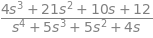

In [30]:
s=sym.symbols('s')
expr = (4*s**3 + 21*s**2 + 10*s + 12)/(s**4 + 5*s**3 + 5*s**2 + 4*s)
expr

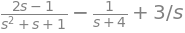

In [31]:
sym.apart(expr)

### Trigonometric simplification

In [32]:
expr = sym.sin(x)**4 - 2*sym.cos(x)**2*sym.sin(x)**2 + sym.cos(x)**4
expr

In [33]:
sym.trigsimp(expr)

In [34]:
sym.trigsimp(sym.sin(x)*sym.tan(x)/sym.sec(x))

In [35]:
sym.sin(x)**2

### Trigonometric expansion

In [36]:
sym.expand(sym.sin(x+y))

In [37]:
sym.expand_trig(sym.sin(x+y))

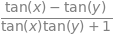

In [38]:
sym.expand_trig(sym.tan(x-y))

In [39]:
expr = sym.sin(2*x) + sym.cos(2*x)
sym.expand_trig(expr)

In [40]:
expr.subs(sym.sin(2*x), 2*sym.sin(x)*sym.cos(x))

In [41]:
expr

### Converting Strings to SymPy Expressions

In [42]:
str_expr = "x**2 + 3*x - 1/2"
expr=sym.sympify(str_expr)
expr

In [43]:
expr.subs(x, 2)

### lambdify

If you intend to evaluate an expression at many points, there are efficient ways. For example, if you wanted to evaluate an expression at a thousand points, using SymPy would be far slower than it needs to be, especially if you only care about machine precision. Instead, you should use libraries like NumPy and SciPy.

The easiest way to convert a SymPy expression to an expression that can be numerically evaluated is to use the `lambdify` function. `lambdify` acts like a `lambda` function, except it converts the SymPy names to the names of the given numerical library, usually NumPy. For example

In [44]:
a = np.linspace(-5,5,1000) 
expr = sym.sin(x)
f = sym.lambdify(x, expr, "numpy") 
f(a)[0:10]

array([0.95892427, 0.96171565, 0.96441066, 0.96700903, 0.96951051,
       0.97191485, 0.9742218 , 0.97643114, 0.97854263, 0.98055608])

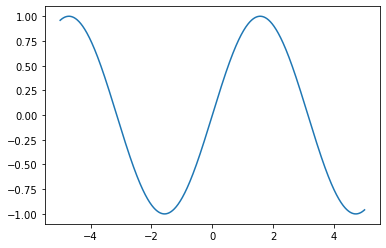

In [45]:
var=f(a).tolist()
plt.plot(a, f(a))

# [Calculus](https://docs.sympy.org/latest/tutorial/calculus.html)
### Derivatives

To take derivatives, use the `diff` function.

In [46]:
sym.diff(sym.cos(x), x)

In [47]:
sym.diff(sym.exp(x**2), x)

`diff` can take multiple derivatives at once. To take multiple derivatives, pass the variable as many times as you wish to differentiate, or pass a number after the variable. For example, both of the following find the third derivative of $x^4$

In [48]:
sym.diff(x**4, x, x, x)

In [49]:
sym.diff(x**4, x, 3)

In [50]:
expr = sym.exp(x*y*z)
sym.diff(expr, x, y, y, z, z, z, z)

In [51]:
sym.diff(expr, x, y, 2, z, 4)

In [52]:
sym.diff(expr, x, y, y, z, 4)

To create an unevaluated derivative, use the `Derivative` class. It has the same syntax as `diff`.

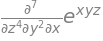

In [53]:
deriv = sym.Derivative(expr, x, y, y, z, 4)
deriv

In [54]:
deriv.doit()

### integrals

To compute an integral, use the `integrate` function. There are two kinds of integrals, definite and indefinite. To compute an indefinite integral, that is, an antiderivative, or primitive, just pass the variable after the expression.

In [55]:
sym.integrate(sym.cos(x), x)

Note that SymPy does not include the constant of integration. If you want it, you can add one yourself, or rephrase your problem as a differential equation and use `dsolve` to solve it, which does add the constant (see Solving Differential Equations).

To compute a definite integral, pass the argument `(integration_variable, lower_limit, upper_limit)`. For example, to compute
$$\int_0^{\infty} e^{-x}$$

In [56]:
sym.integrate(sym.exp(-x), (x, 0, sym.oo))

$\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}e^{-x^2-y^2}\,dx \,dy$

In [57]:
sym.integrate(sym.exp(-x**2 - y**2), (x, '-oo', 'oo'), (y, '-oo', 'oo'))


If `integrate` is unable to compute an integral, it returns an unevaluated `Integral` object.

In [58]:
expr = sym.integrate(x**x, x)
print(expr)

Integral(x**x, x)


As with `Derivative`, you can create an unevaluated integral using `Integral`. To later evaluate this integral, call `doit`.

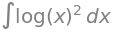

In [59]:
expr = sym.Integral(sym.log(x)**2, x)
expr

In [60]:
expr.doit()

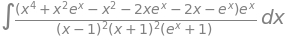

In [61]:
integ = sym.Integral((x**4 + x**2*sym.exp(x) - x**2 - 2*x*sym.exp(x) - 2*x -
    sym.exp(x))*sym.exp(x)/((x - 1)**2*(x + 1)**2*(sym.exp(x) + 1)), x)
integ

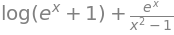

In [62]:
integ.doit()

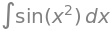

In [63]:
integ = sym.Integral(sym.sin(x**2), x)
integ

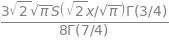

In [64]:
integ.doit()

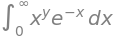

In [65]:
integ = sym.Integral(x**y*sym.exp(-x), (x, 0, 'oo'))
integ

In [66]:
integ.doit()

⎧ Γ(y + 1)    for re(y) > -1
⎪                           
⎪∞                          
⎪⌠                          
⎨⎮  y  -x                   
⎪⎮ x ⋅ℯ   dx    otherwise   
⎪⌡                          
⎪0                          
⎩                           

### Limits

SymPy can compute symbolic limits with the limit function. The syntax to compute is `limit(f(x), x, x0)`.$$\lim_{x \to x_0}f(x)$$

In [67]:
sym.limit(sym.sin(x)/x, x, 0)

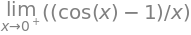

In [68]:
expr = sym.Limit((sym.cos(x) - 1)/x, x, 0)
expr

In [69]:
expr.doit()

In [70]:
sym.limit(1/x, x, 0, '+')

In [71]:
sym.limit(1/x, x, 0, '-')

### Series Expansion

SymPy can compute asymptotic series expansions of functions around a point. To compute the expansion of ${\bf f(x)}$ around the point ${\bf x=x_0}$ terms of order $x^n$, use `f(x).series(x, x0, n)`. $x_0$ and $n$ can be omitted, in which case the defaults $x_0=0$ and $n=6$ will be used.

In [72]:
expr = sym.exp(sym.sin(x))
expr.series(x, 0, 4)

$O(x^4)$ means that all $x$ terms with power greater than or equal to $x^4$ are omitted. Order terms can be created and manipulated outside of `series`. They automatically absorb higher order terms.

In [73]:
x + x**3 + x**6 + sym.O(x**4)

If you do not want the order term, use the `removeO` method.

In [74]:
expr.series(x, 0, 4).removeO()

The $O$ notation supports arbitrary limit points (other than 0)

In [75]:
sym.exp(x - 6).series(x, x0=6)

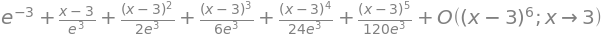

In [76]:
sym.exp(x - 6).series(x, x0=3)

# [Solvers](https://docs.sympy.org/latest/tutorial/solvers.html)

Symbolic equations in SymPy are not represented by `=` or `==`, but by `Eq`.

In [77]:
sym.Eq(x,y)

However, there is an even easier way. In SymPy, any expression not in an `Eq` is automatically assumed to equal 0 by the solving functions. Since $a=b$ if and only if $a−b=0$, this means that instead of using `x == y`, you can just use `x - y`. For example

In [78]:
sym.solveset(sym.Eq(x**2, 1), x)

In [79]:
sym.solveset(sym.Eq(x**2-1, 0), x)

In [80]:
sym.solveset(x**2 - 1, x)

This is particularly useful if the equation you wish to solve is already equal to 0. Instead of typing `solveset(Eq(expr, 0), x)`, you can just use `solveset(expr, x)`.

### Solving Equations Algebraicall

The main function for solving algebraic equations is `solveset`. The syntax for solveset is `solveset(equation, variable=None, domain=S.Complexes)` Where equations may be in the form of Eq instances or expressions that are assumed to be equal to zero.

Please note that there is another function called `solve` which can also be used to solve equations. The syntax is `solve(equations, variables)` However, it is recommended to use `solveset` instead.

When solving a single equation, the output of `solveset` is a `FiniteSet` or an `Interval` or `ImageSet` of the solutions.

In [81]:
sym.solveset(x**2 - x, x)

In [82]:
sym.solveset(x - x, x, domain=sym.S.Reals)

In [83]:
sym.solveset(sym.sin(x) - 1, x, domain=sym.S.Reals)

If there are no solutions, an `EmptySet` is returned and if it is not able to find solutions then a `ConditionSet` is returned.

In [84]:
sym.solveset(sym.exp(x), x)  

In [85]:
sym.solveset(sym.cos(x) - x, x)  # Not able to find solution

### Linear system of equation

In the `solveset` module, the linear system of equations is solved using `linsolve`. In future we would be able to use `linsolve` directly from `solveset`. Following is an example of the syntax of `linsolve`.

In [86]:
sym.linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

Augmented matrix form

In [87]:
sym.linsolve(sym.Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z))

`solveset` reports each solution only once. To get the solutions of a polynomial including multiplicity use `roots`.

In [88]:
sym.solveset(x**3 - 6*x**2 + 9*x, x)

In [89]:
sym.roots(x**3-6*x**2+9*x, x)

The output `{0: 1, 3: 2}` of `roots` means that `0` is a root of multiplicity 1 and `3` is a root of multiplicity 2.

# Solving differential equation

In [90]:
f, g=sym.symbols('f g', cls=sym.Function)

In [91]:
f(x)

`f` and `g` are now undefined functions. We can call `f(x)`, and it will represent an unknown function.

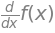

In [92]:
sym.diff(f(x), x)

To represent the differential equation
$$f''(x)-2f'(x)+f(x)=sin(x)$$

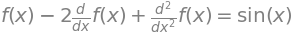

In [93]:
diffq=sym.Eq(f(x).diff(x,2)-2*f(x).diff(x)+f(x), sym.sin(x))
diffq

To solve the ODE, pass it and the function to solve for to `dsolve`

In [94]:
sym.dsolve(diffq, f(x))

# Laplace transform

In [2]:
t,s=sym.symbols('t s')
sym.Heaviside(t)

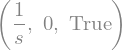

In [3]:
sym.laplace_transform(sym.Heaviside(t),t ,s)

In [4]:
sym.DiracDelta(t)

In [5]:
sym.laplace_transform(sym.DiracDelta(t), t, s)

In [6]:
sym.laplace_transform(sym.DiracDelta(t-2), t, s)

In [7]:
a=sym.symbols('a')
sym.laplace_transform(sym.DiracDelta(t-a), t, s)

In [8]:
sym.laplace_transform(sym.DiracDelta(t-a), t, s,noconds=True).subs(a,0)

In [9]:
sym.laplace_transform(sym.DiracDelta(t-a), t, s)[0].subs(a,0)

In [10]:
sym.laplace_transform(sym.DiracDelta(t-a), t, s)[0].subs(a,2)

In [11]:
sym.laplace_transform(sym.DiracDelta(t-a), t, s)[0].subs(a,1)

In [12]:
sym.laplace_transform(sym.DiracDelta(t-a), t, s)[0].subs(a, .0000001)
# Looks to converge

In [13]:
sym.laplace_transform(sym.DiracDelta(t-a), t, s)[0].subs(a, -.0000001)
#So... here is the illustration.